<a href="https://colab.research.google.com/github/manju-sankar/Thinkful-Capstone-3/blob/main/Capstone_3_Stroke_Analysis_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Analysis Prediction

**OVERVIEW**

Data collected from: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
The data consists of  5110 observations and 12 attributes. This dataset is used to predict whether a patient is likely to get stroke based on the various parameters like age, gender, obesity, glucose levels, heart conditions, marriage and smoking status. Each row in the data provides relevant information about the patient.

GOALS
1.	Look at the relationship between gender, age, various diseases, and smoking status.
2.	How do these factors affect people? Are they the correct predictors of a stroke in a person?


Data Features

1.	id: Identification number of the individual.
2.	gender: Gender of the individual.
3.	hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
4.	heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart diseaseever_married: Personal information, is person married on not?
5.	work_type: Nature of work place.
6.	Residence_type: Residence type of the individual.
7.	avg_glucose_level: Average glucose level in blood for the individual.
8.	bmi: Body Mass Index of the individual.
9.	smoking_status: Current smoking status of individual.
10.	stroke: 1 if the patient had a stroke or 0 if not




------







# Importing the libraries






In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Matplotlib for additional customization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

# supporessing warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# connecting google drive and google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).






---





## DataFrame Creation and Exploration




In [ ]:
# creating DataFrame
stroke_df = pd.read_csv('/content/drive/MyDrive/Thinkful/Capstone/Capstone-Manju/Capstone 3/healthcare-dataset-stroke-data.csv')

In [ ]:
#get the size of dataframe
stroke_df.shape

(5110, 12)

In [ ]:
# Info about the dataset
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Checking for any duplicate rows
stroke_df.duplicated().sum()

0

In [ ]:
#Checking for null values
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only BMI has some missing values

In [ ]:

# Checking the first 5 rows
stroke_df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Cleaning

In [ ]:
# Replacing the null values of BMI with an aggregated value
stroke_df['bmi'].fillna(stroke_df['bmi'].mean(),inplace = True)


In [ ]:
stroke_df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

 Since there is only one 'Other' Category, we can drop it.

In [ ]:
stroke_df.drop(stroke_df[stroke_df['gender']== 'Other'].index, inplace= True)
stroke_df['gender'].nunique()

2

# Visualisations

0    4860
1     249
Name: stroke, dtype: int64


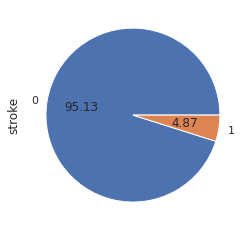

In [ ]:
print(stroke_df.stroke.value_counts())
stroke_df['stroke'].value_counts().plot(kind='pie', autopct='%.2f')


We are clearly dealing with an imbalanced dataset where only 4.87% of the sample population have strokes and 95.13% have no stroke. 

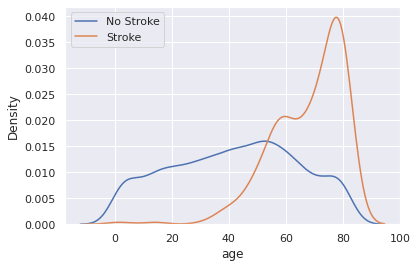

In [ ]:
sns.kdeplot(data = stroke_df[stroke_df['stroke']==0], x = "age", shade = None, label = "No Stroke")
sns.kdeplot(data = stroke_df[stroke_df['stroke']==1], x = "age", shade = None, label = "Stroke")
plt.legend()
plt.show()


*   Patients above 40 years of age are more prone to a stroke.
*   Chances of getting a stroke is slim to none for patients 25 years and less.

Female    2994
Male      2115
Name: gender, dtype: int64


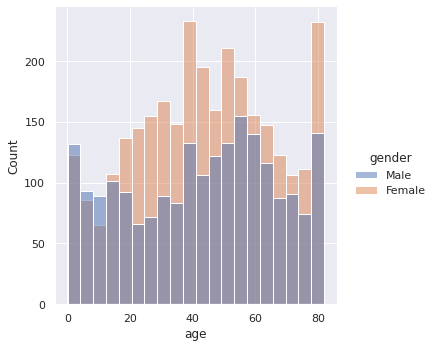

In [ ]:
print(stroke_df.gender.value_counts())
sns.displot(x = 'age', hue = 'gender', data= stroke_df)

### Observation:

There are clearly more females than males in the dataset.

<Figure size 792x576 with 0 Axes>

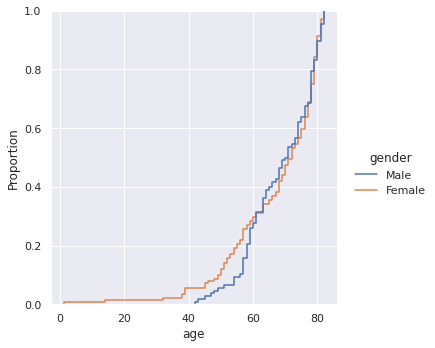

In [ ]:
have_stroke = stroke_df[stroke_df['stroke']==1]
plt.figure(figsize= (11,8))
sns.displot(x = "age", kind = 'ecdf', hue = "gender", data = have_stroke)
plt.grid(True)
plt.show()

### Observation:

Both male and female have an equal chance of getting a stroke but males between 60 and 80 years of age have a slightly higher chance of having a stroke when compared to females.

Yes    220
No      29
Name: ever_married, dtype: int64


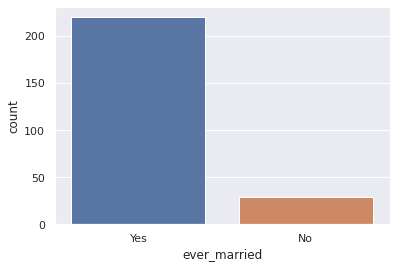

In [ ]:
print(have_stroke.ever_married.value_counts())
sns.countplot(have_stroke.ever_married)

Private          149
Self-employed     65
Govt_job          33
children           2
Name: work_type, dtype: int64


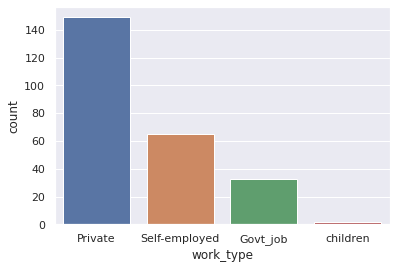

In [ ]:
print(have_stroke.work_type.value_counts())
sns.countplot(have_stroke.work_type)

Urban    135
Rural    114
Name: Residence_type, dtype: int64


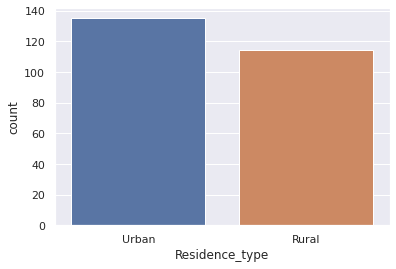

In [ ]:
print(have_stroke.Residence_type.value_counts())
sns.countplot(have_stroke.Residence_type)

never smoked       90
formerly smoked    70
Unknown            47
smokes             42
Name: smoking_status, dtype: int64


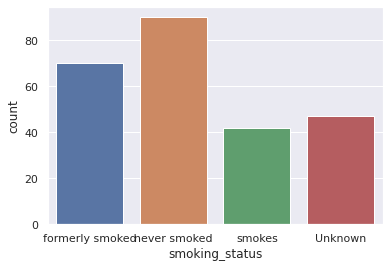

In [ ]:
print(have_stroke.smoking_status.value_counts())
sns.countplot(have_stroke.smoking_status)


### Observations

According to the dataset: 


*   People who are married are prone to a stroke than people who are not.
*   People working in Private sector and self employed have higher chances of stroke.
*   People living in Urban areas are more prone to a stroke than people in rural areas.
*   People who have formerly smoked and are smoking have a high chance of getting a stroke. But according to this particular dataset, people who have never smoked have the highest chance of a stroke which is questionable. It might be due to fact that the dataset is highly imbalanced.










## Descriptive Statistics

In [ ]:
stroke_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5109.0,36513.985516,21162.008804,67.00,17740.00,36922.00,54643.00,72940.00
age,5109.0,43.229986,22.613575,0.08,25.00,45.00,61.00,82.00
hypertension,5109.0,0.097475,0.296633,0.00,0.00,0.00,0.00,1.00
heart_disease,5109.0,0.054022,0.226084,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,5109.0,106.140399,45.285004,55.12,77.24,91.88,114.09,271.74
bmi,5109.0,28.894508,7.698235,10.30,23.80,28.40,32.80,97.60
stroke,5109.0,0.048738,0.215340,0.00,0.00,0.00,0.00,1.00


In [ ]:
#Statistical significance of correlations
stats.pearsonr(stroke_df['bmi'], stroke_df['age'])

(0.32585787906380626, 1.1142394671230584e-126)

In [ ]:
stats.pearsonr(stroke_df['avg_glucose_level'], stroke_df['bmi'])

(0.16890985190584185, 5.220061918606438e-34)

# Hypotheses:


1.  Is there is a significance difference in the age and BMI 
2.  Is there is a significance difference in the glucose levels and BMI 
3.	People with high hypertension are more likely to have a stroke.
4.  People with high heart condition are more likely to have a stroke.




### Hypotheses 1: 

In this t-test, we are examining the difference between two population means based on their respective samples. More specifically, we will check for a statistically significant difference between the two groups.

The null and alternative hypotheses are as follows:

H₀: µ₁ = µ₂
( The mean BMI for those age greater than 45 is equal to the mean BMI for those less than 45.)

Hₐ: µ₁ ≠ µ₂
(The mean BMI for those age greater than 45 is not equal to the mean BMI for those less than 45.)

Where µ₁ is the sample mean of the first group, and µ₂ is the sample mean of the second group.

In [ ]:
age_g45 = stroke_df[(stroke_df['age'] >= 45).values]
age_g45.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2577 non-null   int64  
 1   gender             2577 non-null   object 
 2   age                2577 non-null   float64
 3   hypertension       2577 non-null   int64  
 4   heart_disease      2577 non-null   int64  
 5   ever_married       2577 non-null   object 
 6   work_type          2577 non-null   object 
 7   Residence_type     2577 non-null   object 
 8   avg_glucose_level  2577 non-null   float64
 9   bmi                2577 non-null   float64
 10  smoking_status     2577 non-null   object 
 11  stroke             2577 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 261.7+ KB


In [ ]:
age_l45 = stroke_df[(stroke_df['age'] < 45).values]
age_l45.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2532 entries, 31 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2532 non-null   int64  
 1   gender             2532 non-null   object 
 2   age                2532 non-null   float64
 3   hypertension       2532 non-null   int64  
 4   heart_disease      2532 non-null   int64  
 5   ever_married       2532 non-null   object 
 6   work_type          2532 non-null   object 
 7   Residence_type     2532 non-null   object 
 8   avg_glucose_level  2532 non-null   float64
 9   bmi                2532 non-null   float64
 10  smoking_status     2532 non-null   object 
 11  stroke             2532 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 257.2+ KB


We will be conducting a t-test to compare the means between the above 2 samples.  A low p-value means that it is unlikely to occur by random chance, meaning that you have a significant result. A high p-value means that it is likely that the result that you see is due to random chance—in which case you cannot make meaningful statements about the difference.

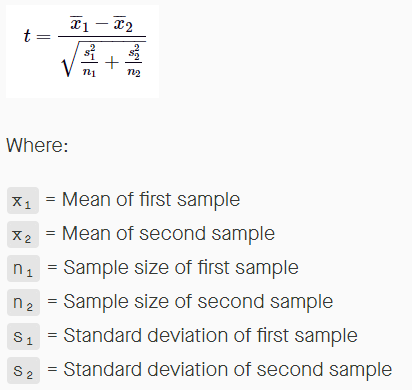

In [ ]:
stats.ttest_ind(age_g45['bmi'], age_l45['bmi'])

Ttest_indResult(statistic=17.210374912390794, pvalue=1.4276153587628098e-64)

There is a difference of 17 standard deviations between these two means. The p-value is extremely small, implying that this is a real difference. Hence, there is a statistical difference between the ages and the bmi

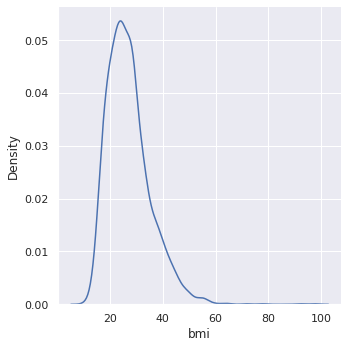

In [ ]:
sns.displot(x= 'bmi', kind ='kde', data = age_l45)


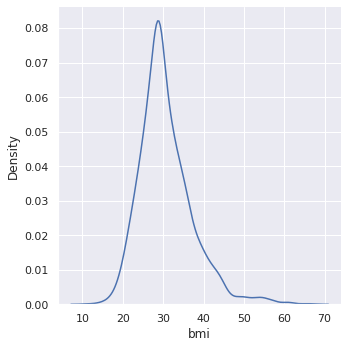

In [ ]:
sns.displot(x= 'bmi',kind = 'kde', data = age_g45)

### Observation:

From the above graphs, we can see that BMI increases as age increases but then after 55 years of age, we tend to see a slow decrease in BMI.


In [ ]:
# Calculate the sample size, mean, and variance of each sample.

sample_1_n = age_l45.shape[0]
sample_2_n = age_g45.shape[0]
sample_1_mean = age_l45['bmi'].mean()
sample_2_mean = age_g45['bmi'].mean()
sample_1_var = age_l45['bmi'].var()
sample_2_var = age_g45['bmi'].var()

In [ ]:
print("The mean BMI of people with age <45 is: ", sample_1_mean )
print("The mean BMI of people with age >45 is: ",sample_2_mean) 

The mean BMI of people with age <45 is:  27.07631915876864
The mean BMI of people with age >45 is:  30.68094703502861


In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means of BMI by Age at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means of BMI by Age at the 95% confidence interval is between 3.193335945469622 and 4.015919807050315.


### Hypotheses 2:

In this t-test, we are examining the difference between two population means based on their respective samples. More specifically, we will check for a statistically significant difference between the two groups.

The null and alternative hypotheses are as follows:

H₀: µ₁ = µ₂
( The mean BMI for individuals with glucose levels greater than 90 is equal to the mean BMI for those less than 90.)

Hₐ: µ₁ ≠ µ₂
(The mean BMI for individuals with glucose levels greater than 90 is not equal to the mean BMI for those less than 90.)

Where µ₁ is the sample mean of the first group, and µ₂ is the sample mean of the second group.

In [ ]:
GL_g90 = stroke_df[(stroke_df['avg_glucose_level'] >= 90).values]
GL_g90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2707 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2707 non-null   int64  
 1   gender             2707 non-null   object 
 2   age                2707 non-null   float64
 3   hypertension       2707 non-null   int64  
 4   heart_disease      2707 non-null   int64  
 5   ever_married       2707 non-null   object 
 6   work_type          2707 non-null   object 
 7   Residence_type     2707 non-null   object 
 8   avg_glucose_level  2707 non-null   float64
 9   bmi                2707 non-null   float64
 10  smoking_status     2707 non-null   object 
 11  stroke             2707 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 274.9+ KB


In [ ]:
GL_l90 = stroke_df[(stroke_df['avg_glucose_level'] < 90).values]
GL_l90.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2402 entries, 6 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2402 non-null   int64  
 1   gender             2402 non-null   object 
 2   age                2402 non-null   float64
 3   hypertension       2402 non-null   int64  
 4   heart_disease      2402 non-null   int64  
 5   ever_married       2402 non-null   object 
 6   work_type          2402 non-null   object 
 7   Residence_type     2402 non-null   object 
 8   avg_glucose_level  2402 non-null   float64
 9   bmi                2402 non-null   float64
 10  smoking_status     2402 non-null   object 
 11  stroke             2402 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 244.0+ KB


A t-test will be conducted to check for significance

In [ ]:
stats.ttest_ind(GL_g90['bmi'], GL_l90['bmi'])

Ttest_indResult(statistic=3.957264885407921, pvalue=7.68416578422278e-05)

The p-value is extremely small, implying that this is a real difference. Hence concluding that there is a significance between Avg.Glucose level and BMI.

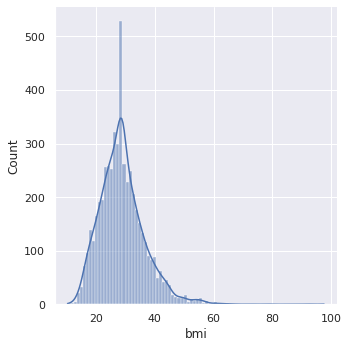

In [ ]:
sns.displot(x='bmi', kde= 'hist', data = stroke_df)

In [ ]:
print( "The mean BMI is {}". format(stroke_df.bmi.mean()))

The mean BMI is 28.894507852666084


### Observation:

The distribution of BMI is fairly normal but we can see that there is massive tail causing the distribution to be right skewed. But there are only 5 values with a BMI greater than 65 meaning that its not going to affect the mean(28.8) that much



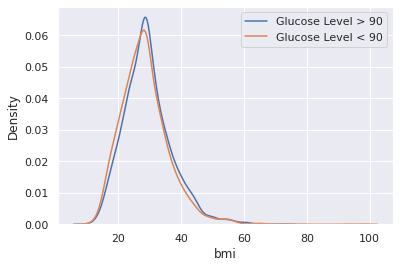

In [ ]:
sns.kdeplot(data = GL_g90, x = "bmi", shade = None, label = "Glucose Level > 90")
sns.kdeplot(data = GL_l90, x = "bmi", shade = None, label = "Glucose Level < 90")
plt.legend()
plt.show()

### Observation :

As the Glucose level increases, so does the BMI.



In [ ]:
# Defining 95% confidence interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean

    import math
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

# Plugging in Hypothesis 2 sample populations and t-test
ci_bmi = get_95_ci(GL_l90['bmi'], GL_g90['bmi'])
print('BMI and Avg. Glucose Level: ' + ci_bmi)

BMI and Avg. Glucose Level: The difference in means at the 95% confidence interval (two-tail) is between 0.42962859133140385 and 1.2757911700858355.


### Hypotheses 3:

## Statistical Analysis on Categorical Features
Hypothesis definition

Null hypothesis, H₀ : Hypertension and Stroke are independent.

Alternative hypothesis, Hₐ : Hypertension and Stroke are dependent

Significance level, α is generally set to 0.05.

•	p-value ≤ α : significant result, reject null hypothesis.

•	p-value > α : not significant result, fail to reject null hypothesis.

•	To analyze whether there is a significant association between two categorical features, Pearson's chi-squared test analysis is commonly used.


We will be conducting a Chi-squared test between hypertension and stroke

In [ ]:
dataset_table_ht=pd.crosstab(stroke_df.hypertension, stroke_df.stroke)
print(dataset_table_ht)

stroke           0    1
hypertension           
0             4428  183
1              432   66


In [ ]:
from scipy.stats import chi2_contingency 
from scipy.stats import chi2
value_ht = stats.chi2_contingency(dataset_table_ht)
value_ht

(81.57314462043591,
 1.688936253410575e-19,
 1,
 array([[4386.27128597,  224.72871403],
        [ 473.72871403,   24.27128597]]))

In [ ]:
print("The chi-statistic is: ", value_ht[0])
print("The p-vlaue is: ", value_ht[1])
print("The degrees of freedom is: ", value_ht[2])

The chi-statistic is:  81.57314462043591
The p-vlaue is:  1.688936253410575e-19
The degrees of freedom is:  1


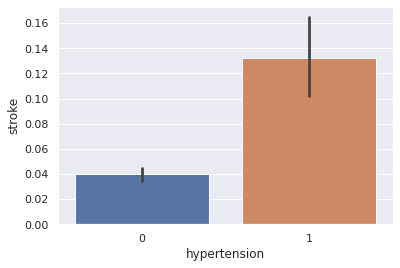

In [ ]:
sns.barplot(x = 'hypertension', y='stroke', data =  stroke_df)

### Observation:

Hypertension can increase your risk of stroke

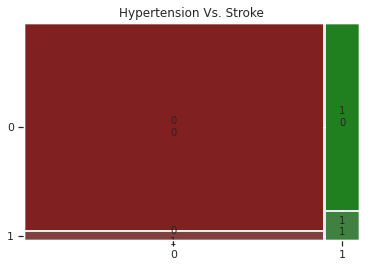

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(stroke_df, ['hypertension','stroke'], gap=0.01,
       properties={'edgecolor':'white'}, title = "Hypertension Vs. Stroke")
plt.show()

People who do not have hypertension have very less chances of getting a stroke.

In [ ]:
alpha = 0.05
prob = 1 - alpha
critical_value_ht = chi2.ppf(prob, value_ht[2])
print("The critical value is: ", critical_value_ht)

The critical value is:  3.841458820694124


In [ ]:
 if value_ht[0]> critical_value_ht:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

 if value_ht[1]<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


Considering that the statistics value is greater than the critical value and the small p-value, we can conclude that there is a significant relationship between hypertension and stroke.

# Hypotheses 4:

Null hypothesis, H₀ : Heartdisease and Stroke are independent.

Alternative hypothesis, Hₐ : Heartdisease and Stroke are dependent

Significance level, α is generally set to 0.05.

•	p-value ≤ α : significant result, reject null hypothesis.

•	p-value > α : not significant result, fail to reject null hypothesis.

•	To analyze whether there is a significant association between two categorical features, Pearson's chi-squared test analysis is commonly used.


We will be conducting a Chi-squared test between heart disease and stroke

In [ ]:
dataset_table_hd=pd.crosstab(stroke_df['heart_disease'],stroke_df['stroke'])
print(dataset_table_hd)

stroke            0    1
heart_disease           
0              4631  202
1               229   47


In [ ]:
value_hd = stats.chi2_contingency(dataset_table_hd)
value_hd

(90.22943664078221,
 2.120831133146208e-21,
 1,
 array([[4597.45155608,  235.54844392],
        [ 262.54844392,   13.45155608]]))

In [ ]:
print("The chi-statistic is: ", value_hd[0])
print("The p-vlaue is: ", value_hd[1])
print("The degrees of freedom is: ", value_hd[2])

The chi-statistic is:  90.22943664078221
The p-vlaue is:  2.120831133146208e-21
The degrees of freedom is:  1


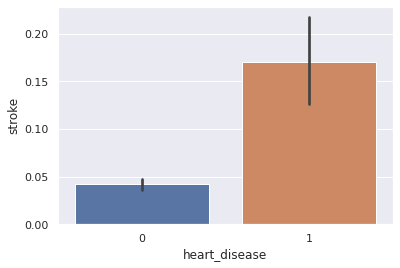

In [ ]:
sns.barplot(x = 'heart_disease', y='stroke', data =  stroke_df)

### Observation

Heart disease can increase your risk of stroke

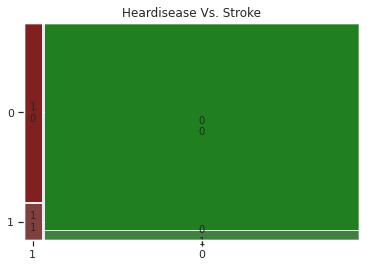

In [ ]:
mosaic(stroke_df, ['heart_disease','stroke'], gap=0.01,
       properties={'edgecolor':'white'},title = "Heardisease Vs. Stroke")
plt.show()

People who do not have heartdisease have very less chances of getting a stroke.

In [ ]:
alpha = 0.05
prob = 1- alpha
critical_value_hd= chi2.ppf(prob, value_ht[2])
print("The critical value is: ", critical_value_hd)

The critical value is:  3.841458820694124


In [ ]:
 if value_hd[0]> critical_value_hd:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

 if value_hd[1]<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


Considering that the statistics value is greater than the critical value and the small p-value, we can conclude that there is a significant relationship between heartdisease and stroke.

# Results 

There is a significant difference in BMI when comparing people who are above 45 years of age and below 45 years of age.

There is a significant difference in BMI when comparing people who have a higher avg.glucose level than people who have a lower glucose level.

We also found out there is a significant difference between stroke and hypertension/ heart disease.

# What can be done to prevent stroke?

Some of the risk factors for Stroke that we have seen are:

1.   Hypertension
2.   Heart condition
3.   Obesity
4.   Diabetes


The reality is that 80% of strokes are preventable.  You can prevent stroke by making healthy life style choices. 



*   Physical activity and exercises can help you stay at a healthy weight and lower your cholesterol and blood pressure levels. 
*   Choose a healthy diet.
*   No Smoking
*   Treating diabetes can delay the onset of complications that increase the risk of stroke.
*   Finally, follow your doctors recommendations carefully.










 
